# Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)
Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

Изначально пропишем функции, которые будут использоваться для анализа временных рядов.

In [2]:
# Функция, являющаяся тестом на стационарность ряда
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
# Функция, позволяющая визуализировать графики
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## Датасет daily-total-female-births-in-cal

In [4]:
# Загружаем временной ряд
series_1 = pd.read_csv('daily-total-female-births-in-cal.csv')['Count']

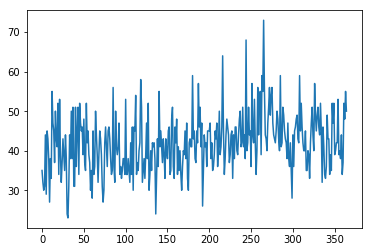

In [5]:
# Строим график
plt.plot(series_1)
plt.show()

Согласно полученному графику, данный временной ряд является стационарным. Проверим это при помощи дальнейшего анализа.

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


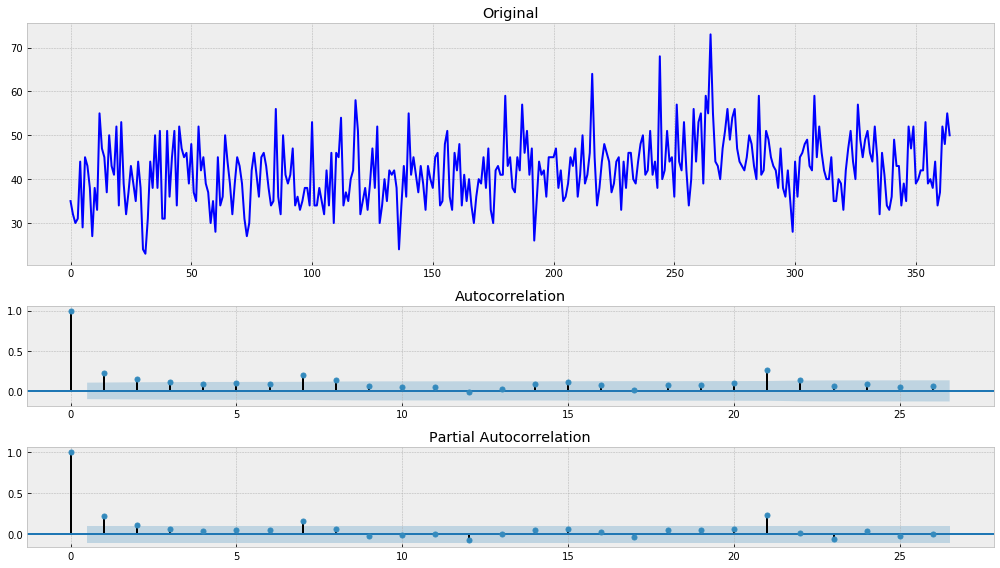

In [6]:
# Проведём анализ функции
tsplot(series_1)

Низкое значение p-value указывает, что ряд стационарный.

## Датасет international-airline-passengers

In [7]:
# Загружаем временной ряд
series_2 = pd.read_csv('international-airline-passengers.csv')['Count']

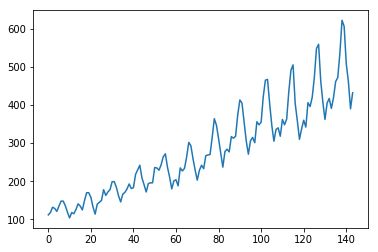

In [8]:
# Строим график
plt.plot(series_2)
plt.show()

Данный временной ряд обладает сезонностью и трендом.

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


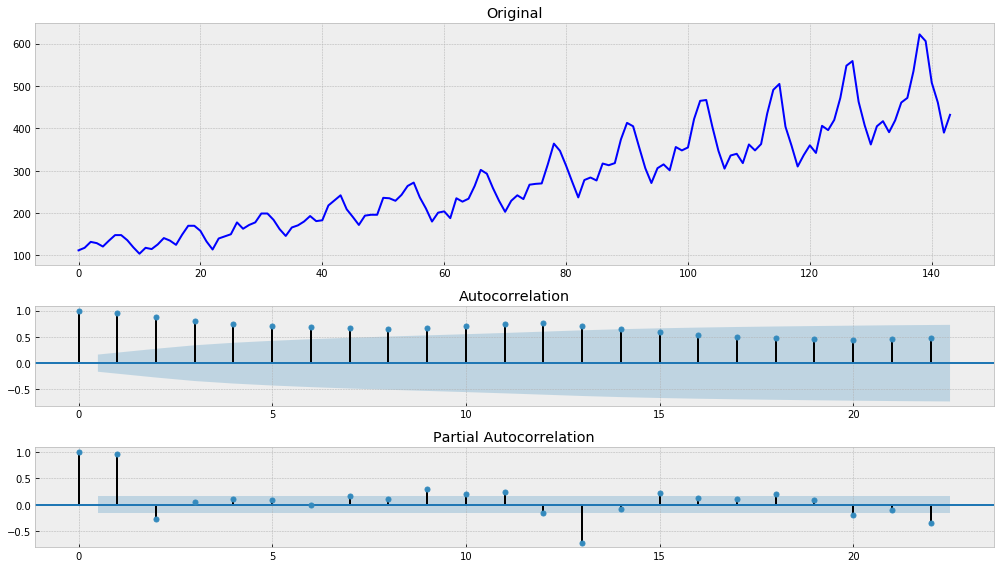

In [9]:
# Проведём анализ функции
tsplot(series_2)

Высокое значение p-value указывает, что ряд нестационарный.

In [10]:
# Уберём изменение дисперсии при помощи преобразования Бокса-Кокса
series_2 = boxcox(series_2, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


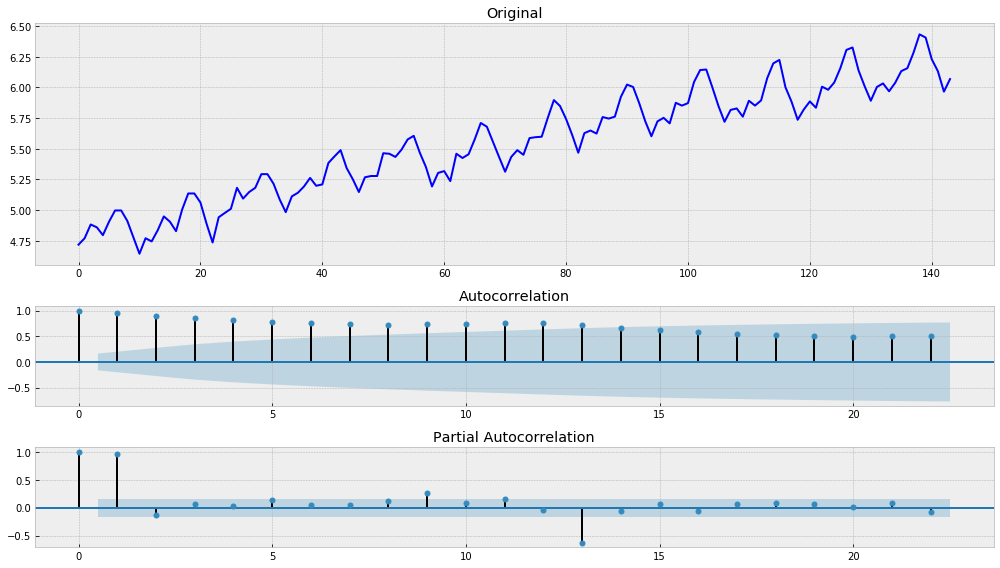

In [11]:
# Проведём анализ функции
tsplot(series_2)

In [12]:
# При помощи дифференцирования уберём сильный тренд
series_2 = series_2[1:] - series_2[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


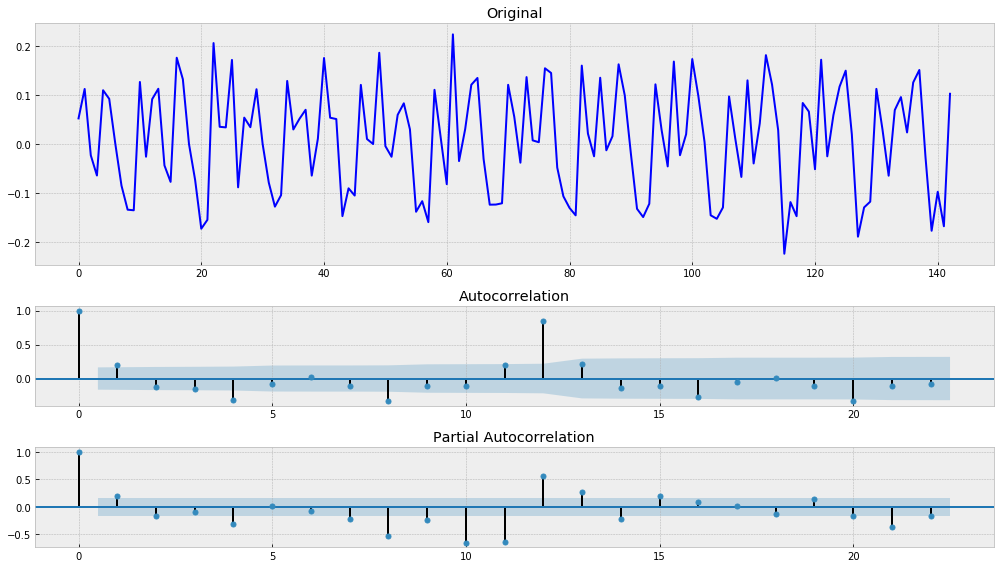

In [13]:
# Проведём анализ функции
tsplot(series_2)

In [14]:
# Уберём влияние сезонности
series_2 = series_2[12:] - series_2[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


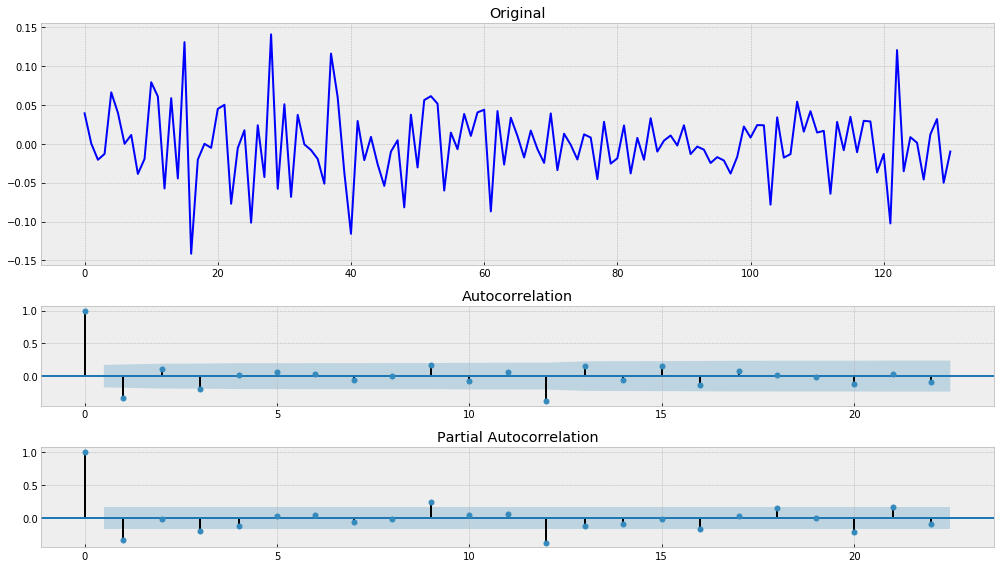

In [15]:
# Проведём анализ функции
tsplot(series_2)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

## Датасет mean-monthly-air-temperature-deg

In [16]:
# Загружаем временной ряд
series_3 = pd.read_csv('mean-monthly-air-temperature-deg.csv')['Deg']

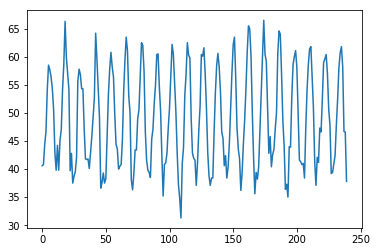

In [17]:
# Строим график
plt.plot(series_3)
plt.show()

Данный временной ряд обладает сезонностью.

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


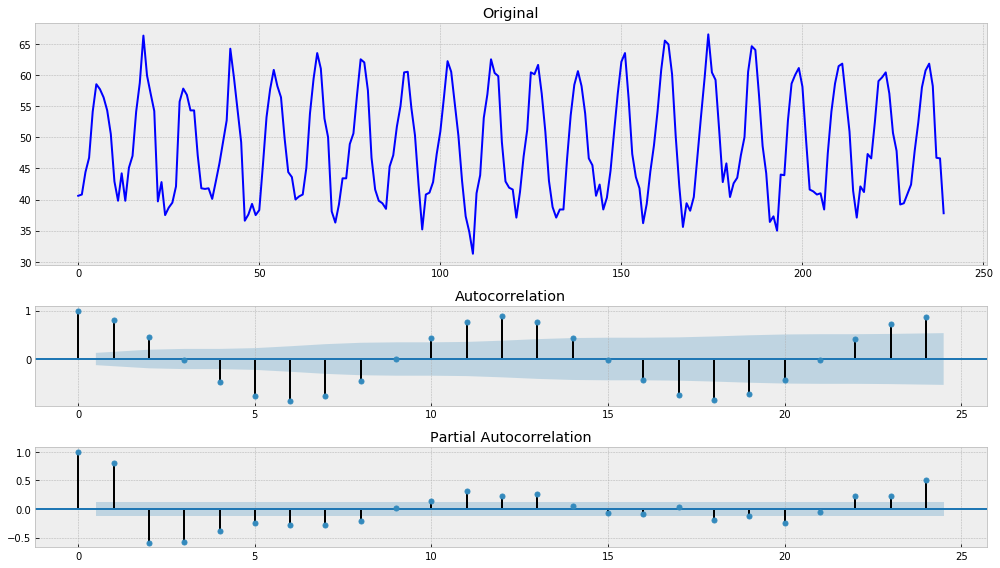

In [18]:
# Проведём анализ функции
tsplot(series_3)

In [19]:
# Уберём изменение дисперсии при помощи преобразования Бокса-Кокса
series_3 = boxcox(series_3, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


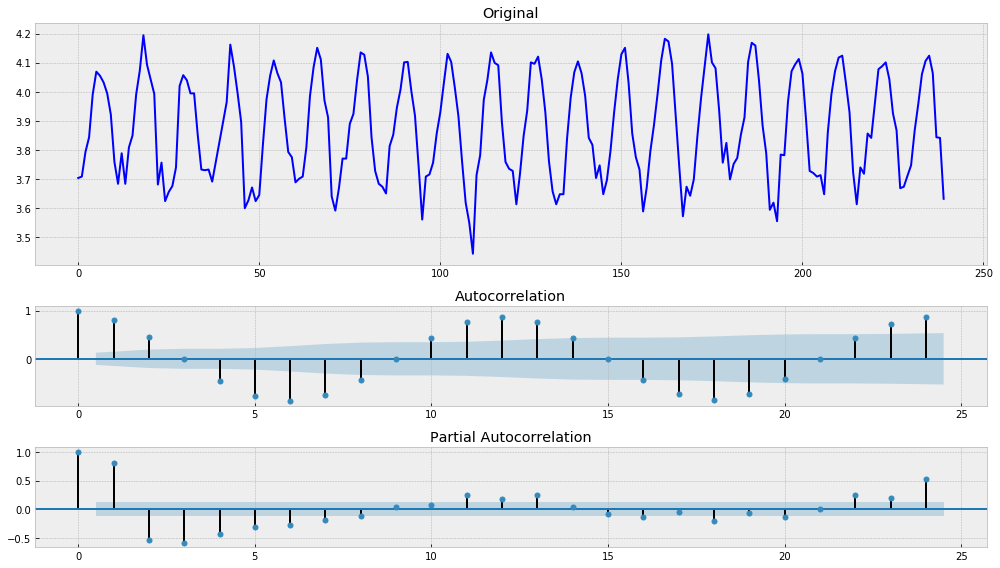

In [20]:
# Проведём анализ функции
tsplot(series_3)

In [21]:
# Уберём влияние сезонности
series_3 = series_3[12:] - series_3[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


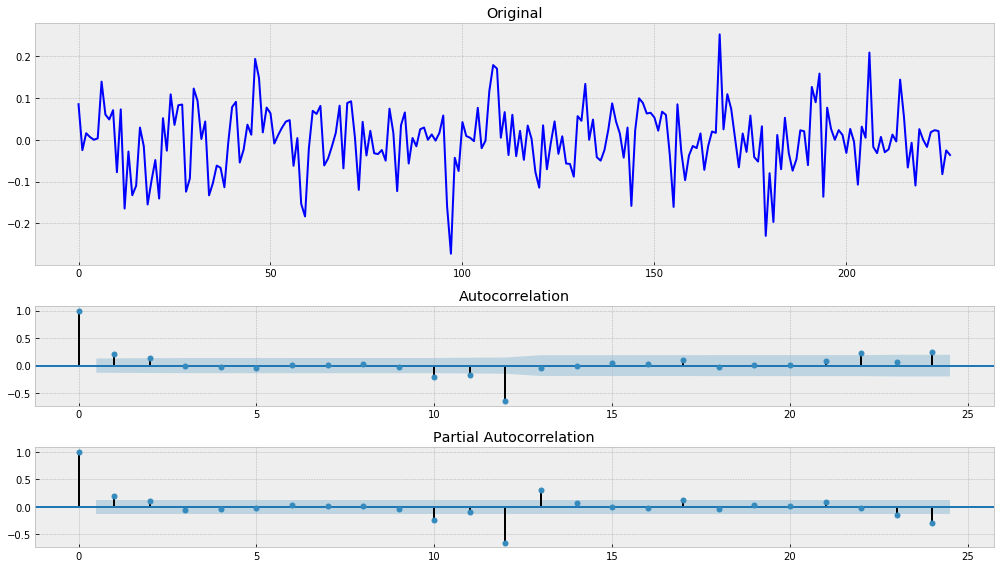

In [22]:
# Проведём анализ функции
tsplot(series_3)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

## Датасет monthly-boston-armed-robberies-j

In [23]:
# Загружаем временной ряд
series_4 = pd.read_csv('monthly-boston-armed-robberies-j.csv')['Count']

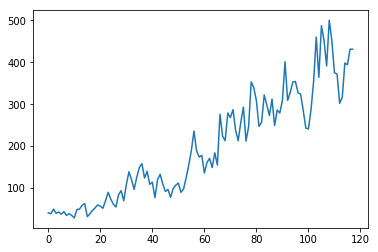

In [24]:
# Строим график
plt.plot(series_4)
plt.show()

Данный временной ряд обладает трендом.

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


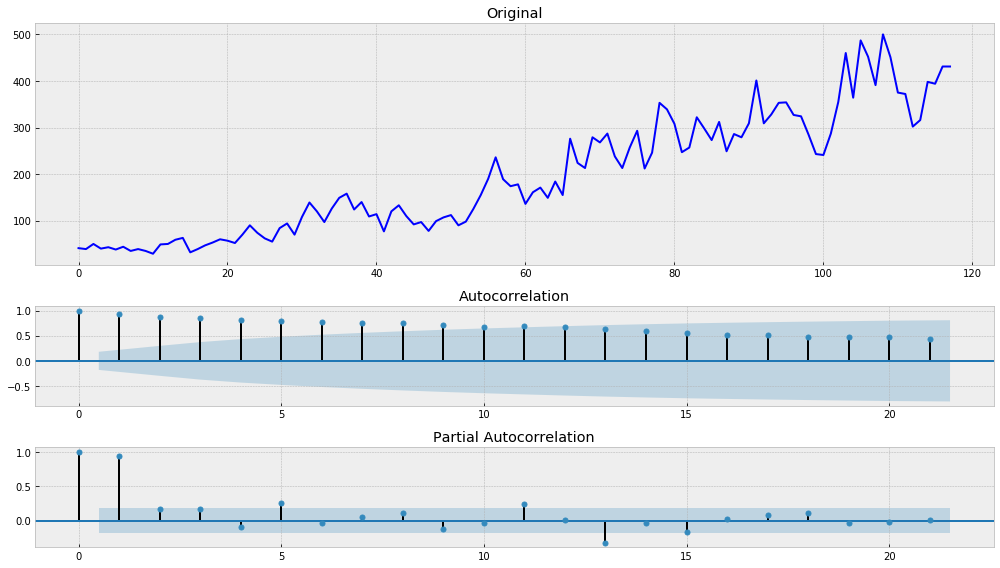

In [25]:
# Проведём анализ функции
tsplot(series_4)

Высокое значение p-value указывает, что ряд нестационарный.

In [26]:
# Уберём изменение дисперсии при помощи преобразования Бокса-Кокса
series_4 = boxcox(series_4, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


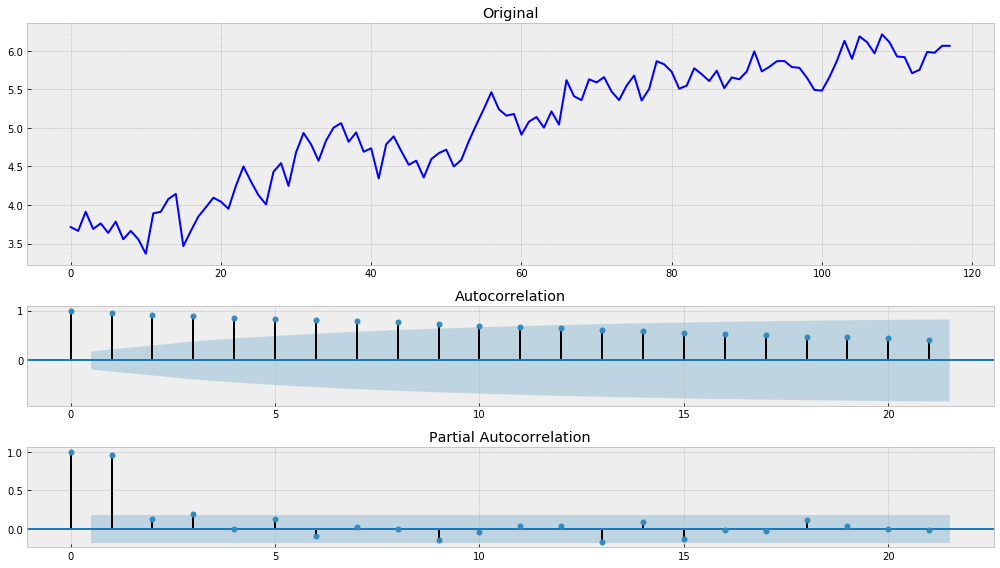

In [27]:
# Проведём анализ функции
tsplot(series_4)

In [28]:
# При помощи дифференцирования уберём сильный тренд
series_4 = series_4[1:] - series_4[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


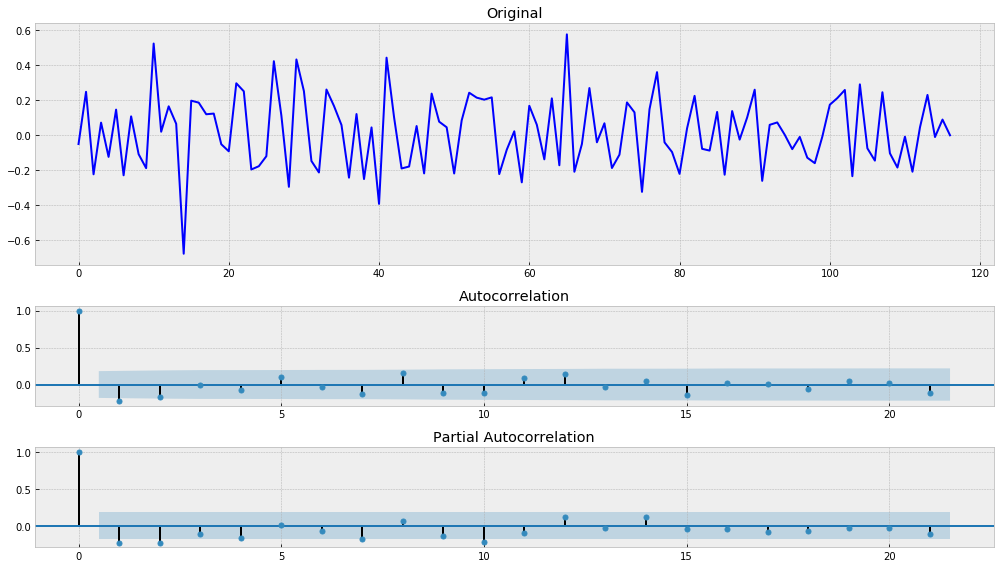

In [29]:
# Проведём анализ функции
tsplot(series_4)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

## Датасет monthly-sales-of-company-x-jan-6

In [30]:
# Загружаем временной ряд
series_5 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')['Count']

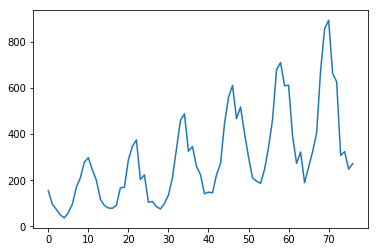

In [31]:
# Строим график
plt.plot(series_5)
plt.show()

Данный временной ряд обладает сезонностью и трендом.

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


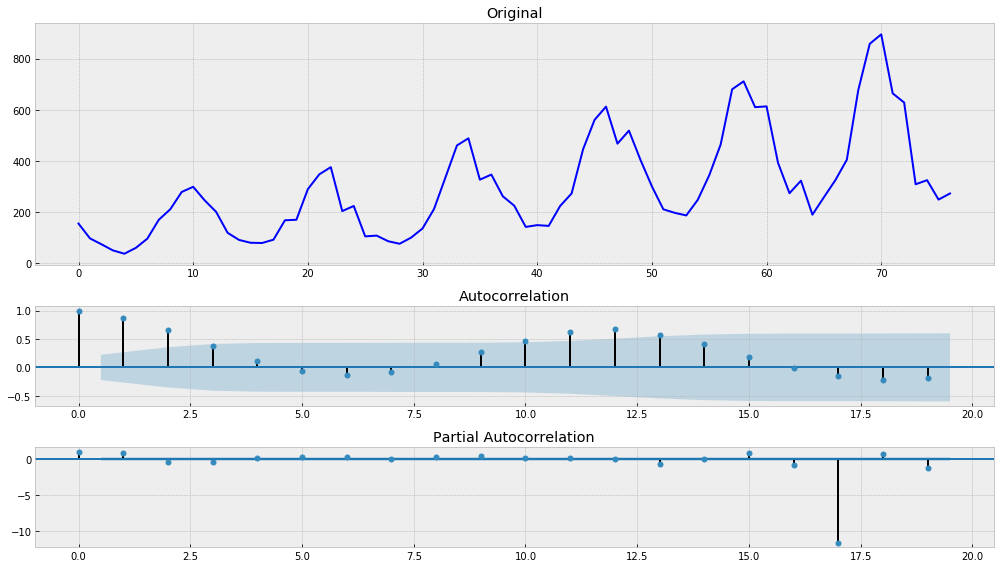

In [32]:
# Проведём анализ функции
tsplot(series_5)

In [33]:
# Уберём изменение дисперсии при помощи преобразования Бокса-Кокса
series_5 = boxcox(series_5, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


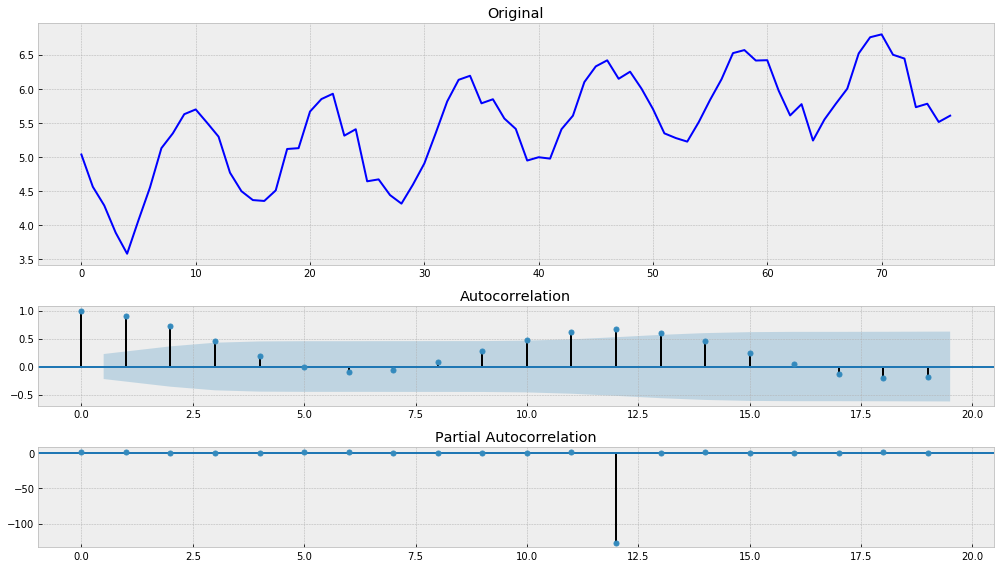

In [34]:
# Проведём анализ функции
tsplot(series_5)

In [35]:
# При помощи дифференцирования уберём  тренд
series_5 = series_5[1:] - series_5[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


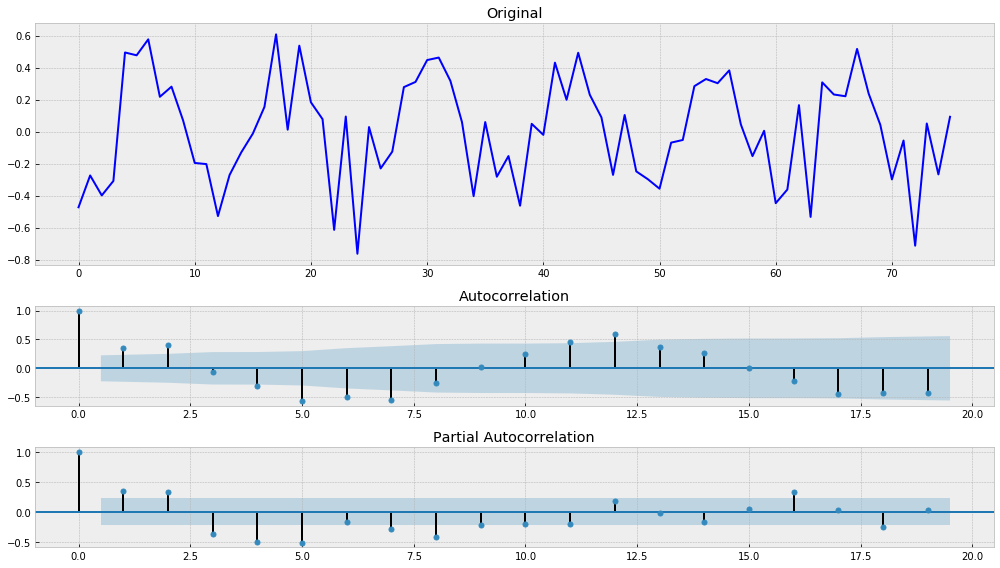

In [36]:
# Проведём анализ функции
tsplot(series_5)

Теперь тест Дики-Фуллера отвергает гипотезу о нестационарности ряда.

## Датасет weekly-closings-of-the-dowjones-

In [37]:
# Загружаем временной ряд
series_6 = pd.read_csv('weekly-closings-of-the-dowjones-.csv')['Close']

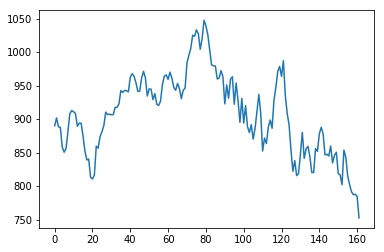

In [38]:
# Строим график
plt.plot(series_6)
plt.show()

Данный временной ряд обладает трендом.

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


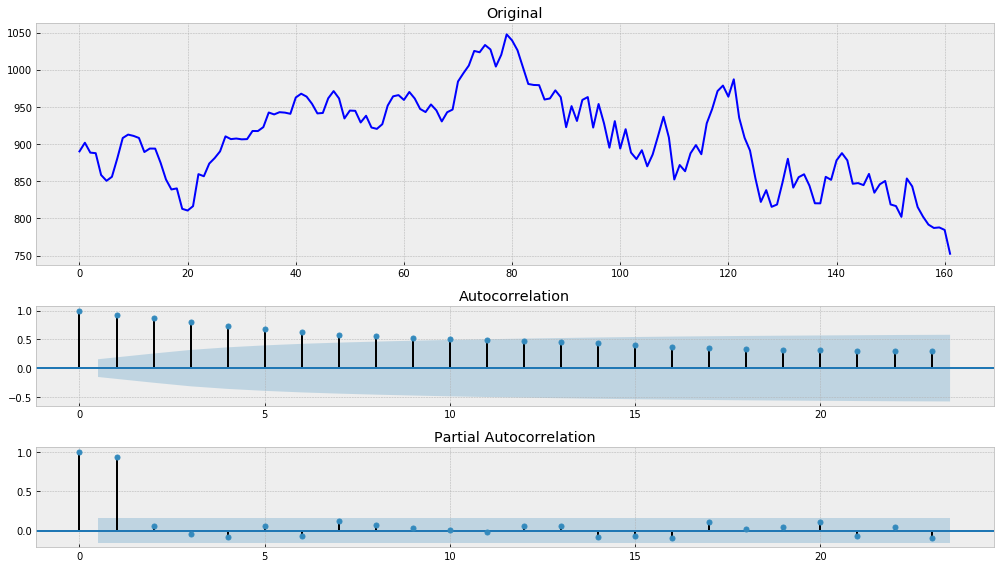

In [39]:
# Проведём анализ функции
tsplot(series_6)

In [40]:
# Уберём изменение дисперсии при помощи преобразования Бокса-Кокса
series_6 = boxcox(series_6, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


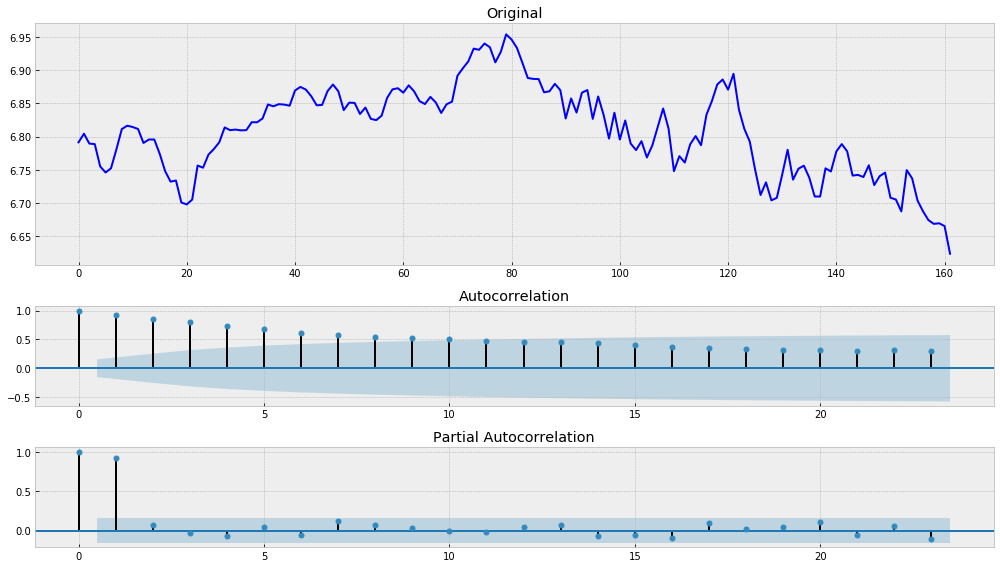

In [41]:
# Проведём анализ функции
tsplot(series_6)

In [42]:
# При помощи дифференцирования уберём сильный тренд
series_6 = series_6[1:] - series_6[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


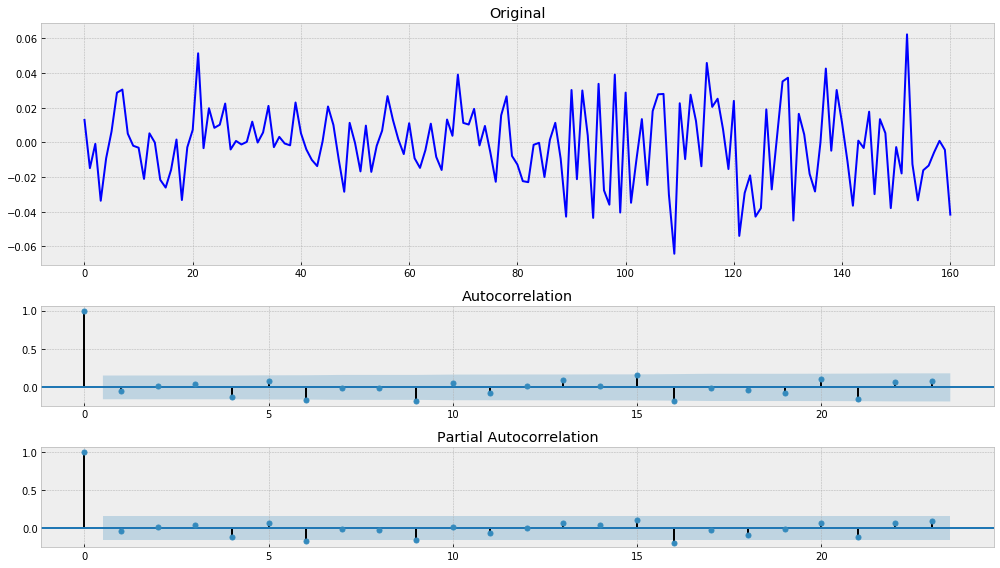

In [43]:
# Проведём анализ функции
tsplot(series_6)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.